In [3]:
# Importando as bibliotecas necessárias
import numpy as np  # Para manipulação de arrays
import pandas as pd  # Para manipulação de DataFrames
import matplotlib.pyplot as plt  # Para visualização de dados
import seaborn as sns  # Para visualização mais elegante de dados
from sklearn.model_selection import train_test_split  # Para dividir os dados em treino e teste
from sklearn.linear_model import LinearRegression  # O modelo de regressão linear
from sklearn.metrics import mean_squared_error, r2_score  # Para avaliar o desempenho do modelo
from sklearn.datasets import fetch_california_housing  # Dataset California Housing

In [4]:
# Carregando o dataset California Housing
california = fetch_california_housing()

In [ ]:
# Convertendo os dados em um DataFrame para facilitar a manipulação
df = pd.DataFrame(california.data, columns=california.feature_names)
print(df)

In [ ]:
# Adicionando a coluna alvo (o preço das casas) ao DataFrame
df['PRICE'] = california.target
print(df)

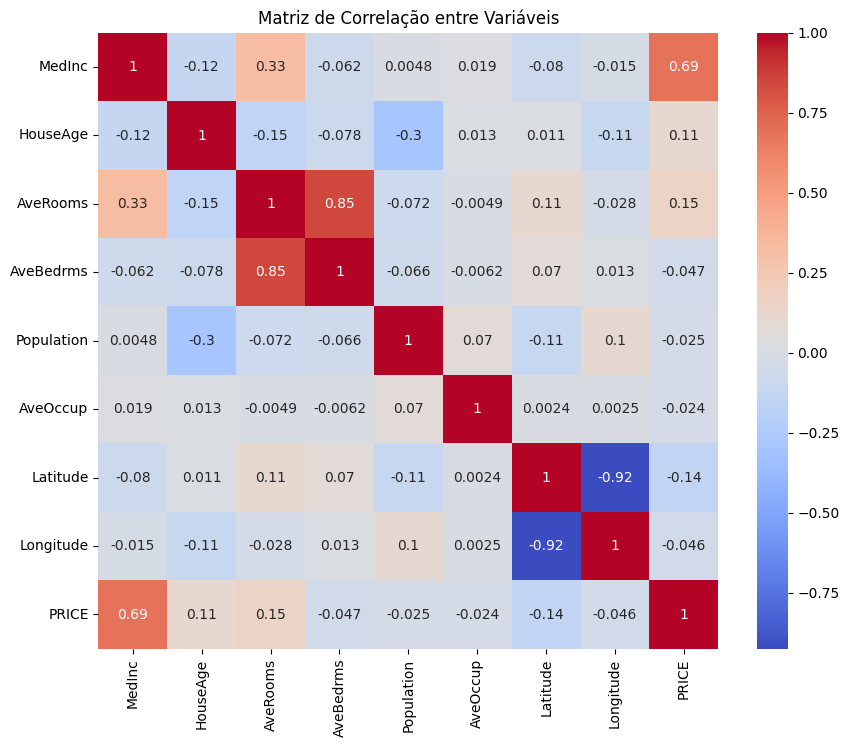

In [9]:
# Análise exploratória básica: visualizando a correlação entre as variáveis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

In [10]:
# Definindo as variáveis independentes (features) e a variável dependente (target)
X = df.drop('PRICE', axis=1)  # Todas as colunas exceto a coluna alvo
y = df['PRICE']  # A coluna alvo

In [11]:
# Dividindo os dados em conjuntos de treino e teste (80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Criando o modelo de regressão linear
model = LinearRegression()

In [13]:
# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

In [15]:
# Avaliando o desempenho do modelo usando o erro quadrático médio (MSE) e o R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")


Erro Quadrático Médio (MSE): 0.555891598695244
Coeficiente de Determinação (R²): 0.5757877060324511


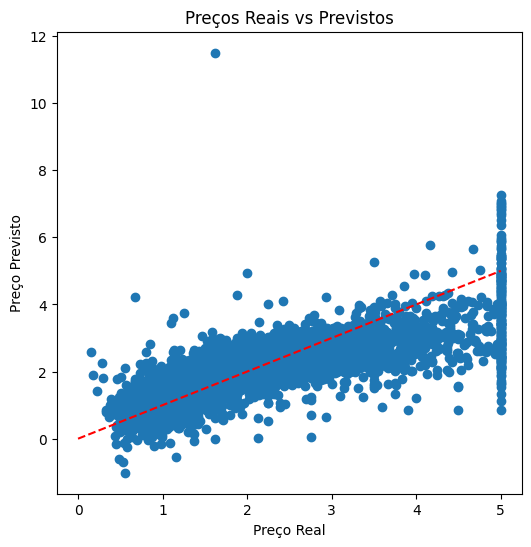

In [16]:
# Visualizando a relação entre os valores reais e previstos
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, 5], [0, 5], '--r')  # Linha de referência
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.title('Preços Reais vs Previstos')
plt.show()

In [17]:

# Exibindo os coeficientes (pesos) das variáveis no modelo de regressão
print("Coeficientes das variáveis no modelo:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")


Coeficientes das variáveis no modelo:
MedInc: 0.4487
HouseAge: 0.0097
AveRooms: -0.1233
AveBedrms: 0.7831
Population: -0.0000
AveOccup: -0.0035
Latitude: -0.4198
Longitude: -0.4337
